In [146]:
%matplotlib inline

# For Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Manipulating and Storing Data
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)

# Machine Learning
from sklearn import linear_model

In [147]:
! ls

Subplotting and EDA with Housing Data.ipynb
melb_data.csv


In [148]:
df = pd.read_csv('melb_data.csv')
df.head(3)

Suburb          Address  Rooms Type      Price Method SellerG  \
0  Abbotsford     85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford  25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford     5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0  3/12/2016       2.5    3067.0       2.0       1.0  1.0     202.0   
1  4/02/2016       2.5    3067.0       2.0       1.0  0.0     156.0   
2  4/03/2017       2.5    3067.0       3.0       2.0  0.0     134.0   

   BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
0           NaN        NaN       Yarra   -37.7996    144.9984   
1          79.0     1900.0       Yarra   -37.8079    144.9934   
2         150.0     1900.0       Yarra   -37.8093    144.9944   

              Regionname  Propertycount  
0  Northern Metropolitan         4019.0  
1  Northern Metropolitan         4019.0  
2  Northern Metropolitan         4019.0

In [149]:
print("Unique Values by Column")
for col in df.columns:
    print(f"{col}: {len(df[col].unique())}")

Unique Values by Column
Suburb: 314
Address: 13378
Rooms: 9
Type: 3
Price: 2204
Method: 5
SellerG: 268
Date: 58
Distance: 202
Postcode: 198
Bedroom2: 12
Bathroom: 9
Car: 12
Landsize: 1448
BuildingArea: 603
YearBuilt: 145
CouncilArea: 34
Lattitude: 6503
Longtitude: 7063
Regionname: 8
Propertycount: 311


In [150]:
categorical_columns = [col for col in df.columns if len(df[col].unique())<20]
categorical_columns

['Rooms', 'Type', 'Method', 'Bedroom2', 'Bathroom', 'Car', 'Regionname']

In [ ]:
# Label encoding RegionName to avoid overly verbose outputs...we will cover this later.
df['Regionname'] , _ = pd.factorize(df['Regionname'])

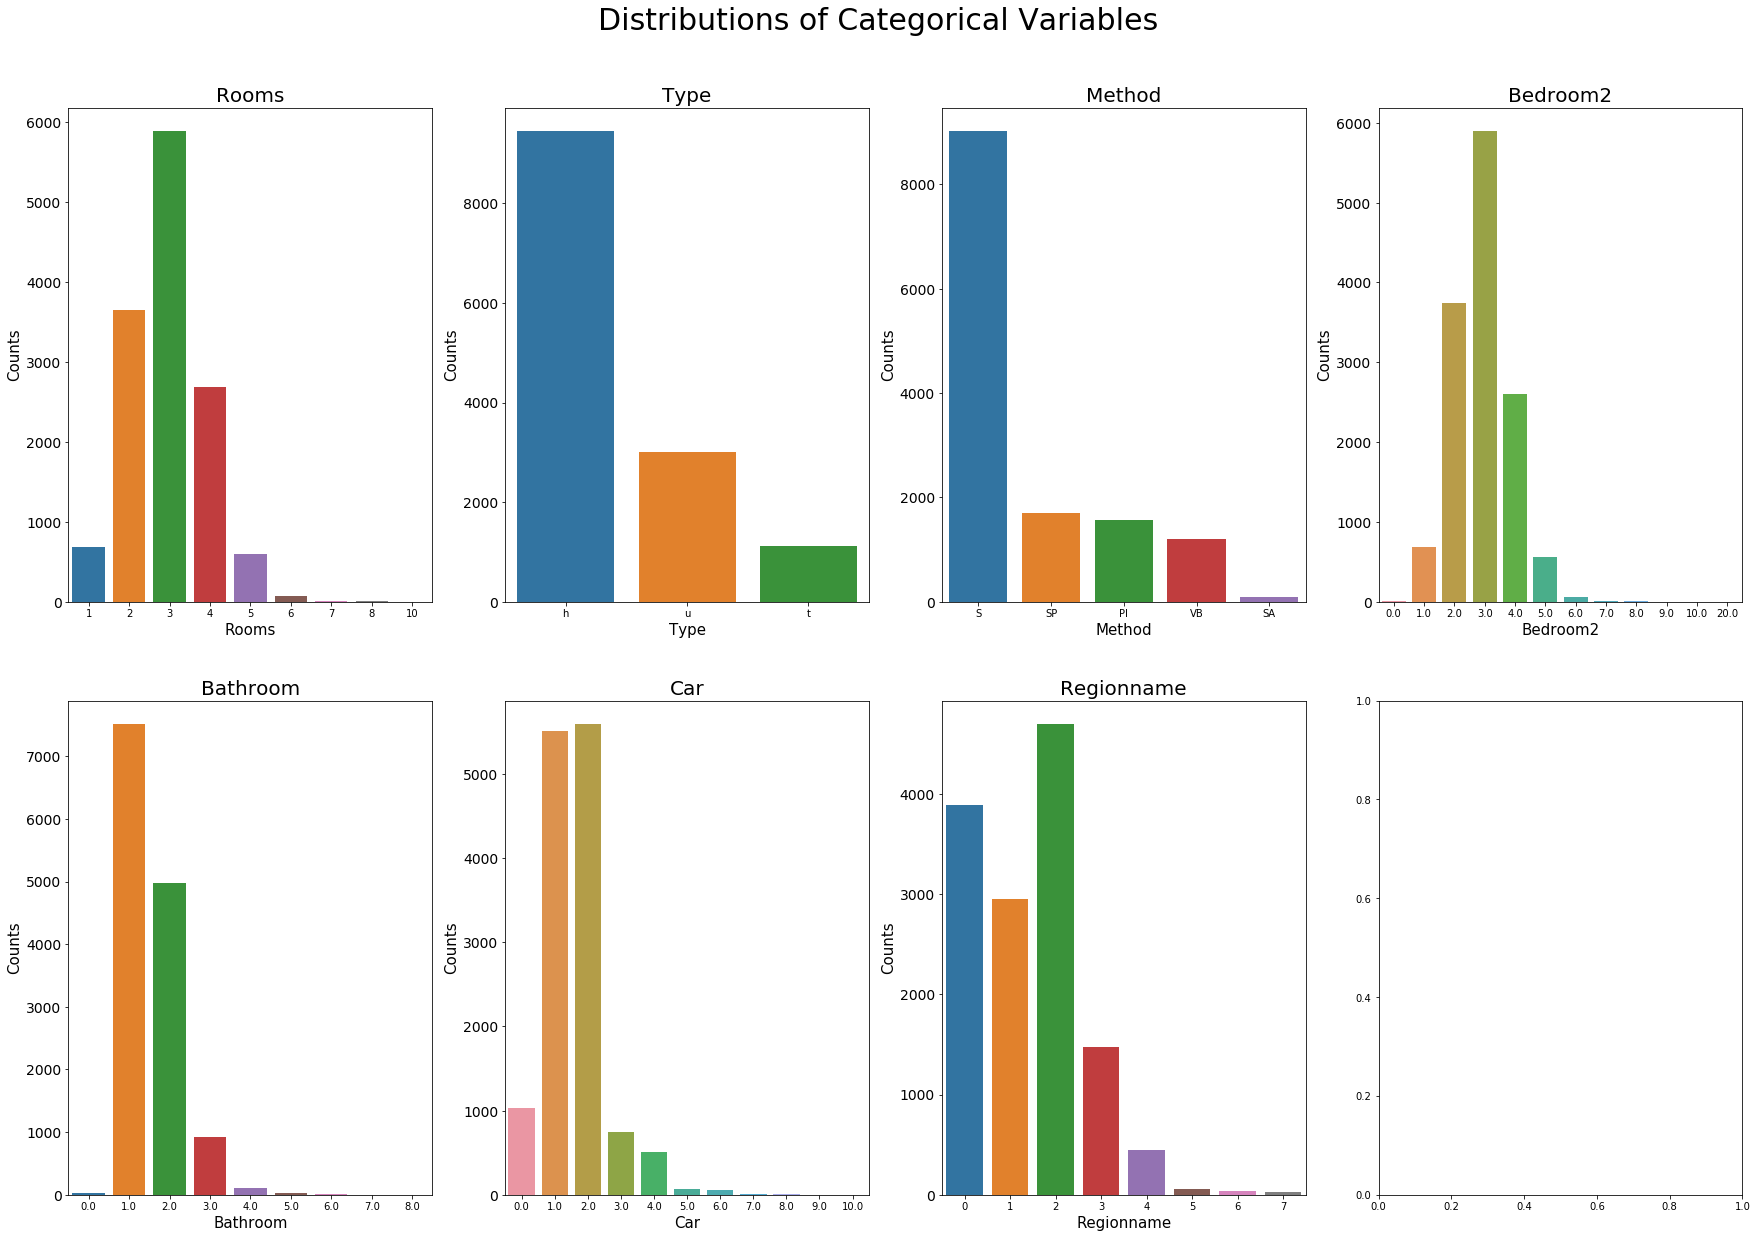

In [154]:
f,axes = plt.subplots(2,4,figsize=(30,20))
axes = axes.ravel()
for i,col in enumerate(categorical_columns):
    sns.countplot(df[col],ax=axes[i])
    axes[i].set_title(f'{col}',size=20)
    axes[i].set_xlabel(col,size=15)
    axes[i].set_ylabel('Counts',size=15)
    axes[i].tick_params(axis='y', labelsize=14)
plt.suptitle('Distributions of Categorical Variables',
             size=30,
             y=0.95)
                            
plt.show()

Rooms and Bedroom2 appear to be duplicates of each other so we can drop one of these columns. From the distributions we can see a few things right away. Most houses have three bedrooms and 1-2 bathrooms. A vast majority of houses contain 1-2 cars (likely parking spaces).

In [155]:
df = df.drop(columns=['Bedroom2'])

# Numeric Plots and Suspicious Values

In [183]:
numeric_columns = ['Price','Landsize','BuildingArea','YearBuilt','Lattitude','Longtitude']